In [152]:
import sklearn
from sklearn import model_selection, datasets, tree, metrics
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [49]:
data = datasets.load_boston()

In [154]:
X = pd.DataFrame(data["data"])
y = pd.DataFrame(data["target"])

In [157]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [155]:
X.shape

(506, 13)

In [136]:
X_train, X_test,y_train, y_test = model_selection.train_test_split(X,y,test_size=0.25)

In [137]:
X_train.shape

(379, 13)

In [62]:
train_score = []
test_score = []
coef_list = []
base_alg_list = []

In [63]:
def gbm_predict(X, base_algorithms_list, coefficients_list):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

In [64]:
for i in range(50):
    clf = tree.DecisionTreeRegressor(max_depth = 5, random_state = 42)
    if i == 0:
        clf.fit(X_train, y_train)    
    else:
        prediction = gbm_predict(X_train, base_alg_list, coef_list)
        s = y_train - prediction
        clf.fit(X_train, s)
    
    base_alg_list.append(clf)
    coef_list.append(0.9)
    train_score.append(metrics.mean_squared_error(y_train, gbm_predict(X_train, base_alg_list, coef_list)))
    test_score.append(metrics.mean_squared_error(y_test, gbm_predict(X_test, base_alg_list, coef_list)))

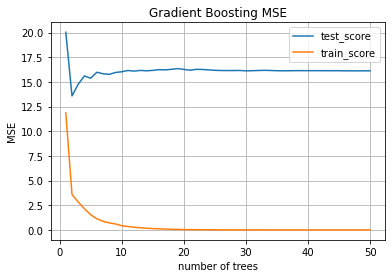

In [115]:
plt.plot(np.arange(1, 51, 1), test_score)
plt.plot(np.arange(1, 51, 1), train_score)
plt.legend(("test_score", "train_score"))
plt.title('Gradient Boosting MSE')
plt.xlabel('number of trees')
plt.ylabel('MSE')
plt.grid("true")

In [116]:
metrics.mean_squared_error(y_test, gbm_predict(X_test, base_alg_list, coef_list))**0.5

4.015663380008401

Text(0, 0.5, 'prediction')

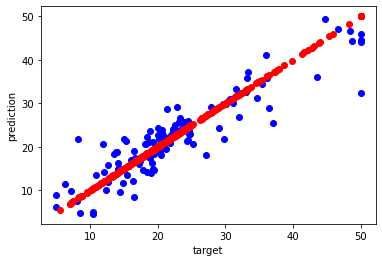

In [125]:
plt.scatter(y_test, gbm_predict(X_test, base_alg_list, coef_list), color = 'blue')
plt.scatter(y_train, gbm_predict(X_train, base_alg_list, coef_list), color = 'red')
plt.xlabel('target')
plt.ylabel('prediction')

In [139]:
base_algorithms_list2 = []
coefficients_list2 = []
train_scores2 = []
test_scores2 = []

for i in range(50):
    clf = tree.DecisionTreeRegressor(max_depth = 5, random_state = 42)
    if i == 0:
        clf.fit(X_train, y_train)    
    else:
        prediction = gbm_predict(X_train, base_algorithms_list2, coefficients_list2)
        s = y_train - prediction
        clf.fit(X_train, s)
    
    base_algorithms_list2.append(clf)
    coefficients_list2.append(0.9/(i + 1.0))
    train_scores2.append(metrics.mean_squared_error(y_train, gbm_predict(X_train, base_algorithms_list2, coefficients_list2)))
    test_scores2.append(metrics.mean_squared_error(y_test, gbm_predict(X_test, base_algorithms_list2, coefficients_list2)))

Text(0, 0.5, 'MSE')

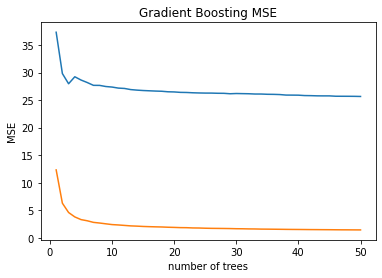

In [142]:
plt.plot(np.arange(1, 51, 1), test_scores2, label = 'test scores')
plt.plot(np.arange(1, 51, 1), train_scores2, label = 'train scores')
plt.title('Gradient Boosting MSE')
plt.xlabel('number of trees')
plt.ylabel('MSE')

In [143]:
metrics.mean_squared_error(y_test, gbm_predict(X_test, base_algorithms_list2, coefficients_list2))**0.5

5.065668511162316

Text(0, 0.5, 'prediction')

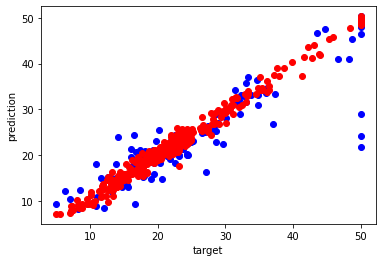

In [144]:
plt.scatter(y_test, gbm_predict(X_test, base_algorithms_list2, coefficients_list2), color = 'blue')
plt.scatter(y_train, gbm_predict(X_train, base_algorithms_list2, coefficients_list2), color = 'red')
plt.xlabel('target')
plt.ylabel('prediction')

In [145]:
import xgboost as xgb

In [182]:
for i in np.arange(0.1, 2,0.5):
    print(i)

0.1
0.6
1.1
1.6


In [187]:
score_train4=[]
score_test4 = []
for i in np.arange(0.001,0.5,0.05):
    estimator = xgb.XGBRegressor(learning_rate=i, max_depth=5, n_estimators=50)
    estimator.fit(X_train,y_train)  
    score_clf = metrics.mean_squared_error(y_train, estimator.predict(X_train))
    score_train4.append(score_clf)
    score_test4.append(metrics.mean_squared_error(y_test, estimator.predict(X_test)))

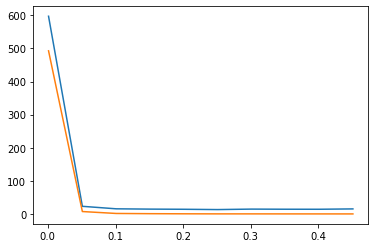

In [189]:
plt.plot(np.arange(0.001,0.5,0.05), score_test4)
plt.plot(np.arange(0.001,0.5,0.05), score_train4)

# Зависимость от числа деревьев

In [194]:
number_trees = np.arange(5, 1000, 5)
train_scores = []
test_scores = []

for tree in number_trees:
    clf = xgb.XGBRegressor(n_estimators = tree)
    clf.fit(X_train, y_train)
    train_scores.append(metrics.mean_squared_error(y_train, clf.predict(X_train)))
    test_scores.append(metrics.mean_squared_error(y_test, clf.predict(X_test)))

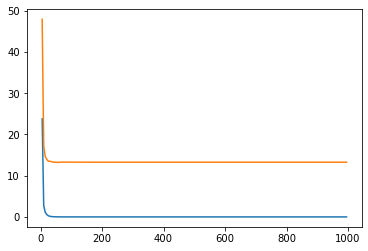

In [195]:
plt.plot(number_trees, train_scores)
plt.plot(number_trees, test_scores)


# Зависимость от глубины дерева

In [197]:
tree_depth = np.arange(1, 50, 1)
train_scores = []
test_scores = []

for depth in tree_depth:
    clf = xgb.XGBRegressor(max_depth = depth)
    clf.fit(X_train, y_train)
    train_scores.append(metrics.mean_squared_error(y_train, clf.predict(X_train)))
    test_scores.append(metrics.mean_squared_error(y_test, clf.predict(X_test)))

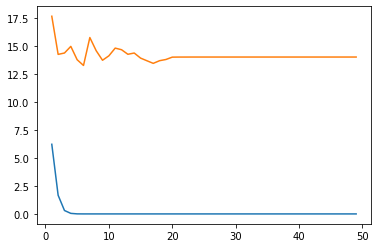

In [198]:
plt.plot(tree_depth, train_scores)
plt.plot(tree_depth, test_scores)

In [199]:
from sklearn.linear_model import LinearRegression

In [201]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score_lr = metrics.mean_squared_error(y_test, lr.predict(X_test))
score_lr**0.5

5.4025959576874865

Text(0, 0.5, 'prediction')

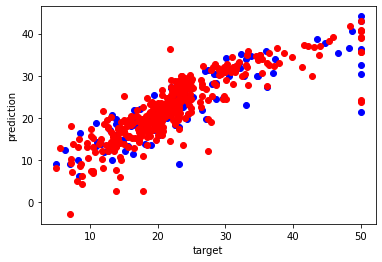

In [202]:
plt.scatter(y_test, lr.predict(X_test), color = 'blue')
plt.scatter(y_train, lr.predict(X_train), color = 'red')
plt.xlabel('target')
plt.ylabel('prediction')